LINEAR REGRESSION

Datasets - https://github.com/stedy/Machine-Learning-with-R-datasets


https://github.com/JovianHQ/opendatasets/tree/master/data

In [1]:
import pandas as pd

In [2]:
medical_data=pd.read_csv('https://raw.githubusercontent.com/JovianHQ/opendatasets/master/data/medical-charges.csv')

In [3]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Histogram

Min age is 18 and Max age is 64

64-18+1=47 bins for each year

In [8]:
fig=px.histogram(medical_data,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig=px.histogram(medical_data,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig=px.histogram(medical_data,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title="Annual medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
px.histogram(medical_data,x='smoker',color='sex',title='smoker')

In [12]:
fig=px.scatter(medical_data,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age VS Charges')
fig.update_traces(marker_size=5)
fig.show()

In [13]:
fig=px.scatter(medical_data,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [14]:
px.violin(medical_data,x='children',y='charges')

Correlation

In [15]:
medical_data.charges.corr(medical_data.age)

0.2990081933306476

In [16]:
medical_data.charges.corr(medical_data.bmi)

0.19834096883362895

In [17]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_data.smoker.map(smoker_values)
medical_data.charges.corr(smoker_numeric)

0.787251430498478

In [18]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [19]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
sex_values = {'female': 0, 'male': 1}
medical_data['sex'] = medical_data['sex'].map(sex_values)

In [21]:
smoker_values = {'no': 0, 'yes': 1}
medical_data['smoker'] = medical_data['smoker'].map(smoker_values)

In [22]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
medical_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [25]:
# Fit and transform the 'region' column to numerical values
medical_data['region'] = label_encoder.fit_transform(medical_data['region'])

# Display the unique numerical values
unique_region_numeric = medical_data['region'].unique()
print("Unique numeric regions:", unique_region_numeric)

Unique numeric regions: [3 2 1 0]


In [26]:
medical_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

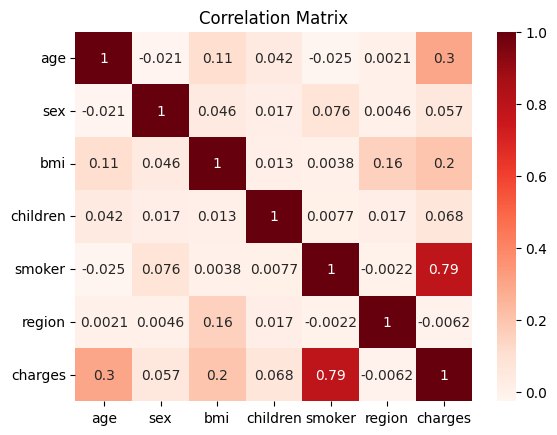

In [27]:
sns.heatmap(medical_data.corr(),cmap="Reds",annot=True)
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

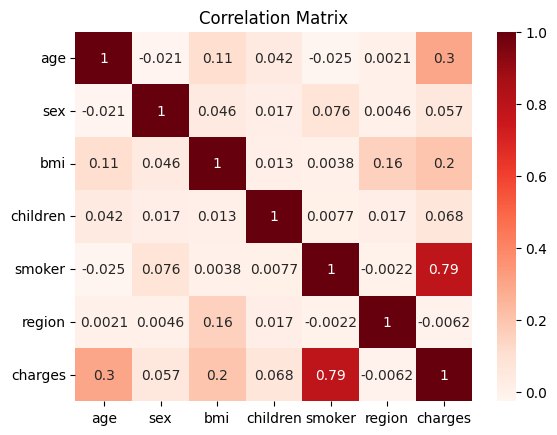

In [28]:
sns.heatmap(medical_data.corr(),cmap="Reds",annot=True)
plt.title("Correlation Matrix")

Linear Regression Using a Single Feature

In [29]:
medical_df=pd.read_csv('https://raw.githubusercontent.com/JovianHQ/opendatasets/master/data/medical-charges.csv')

In [30]:
non_smoker_df=medical_df[medical_df.smoker == "no"]

<Axes: title={'center': 'Age Vs Charges'}, xlabel='age', ylabel='charges'>

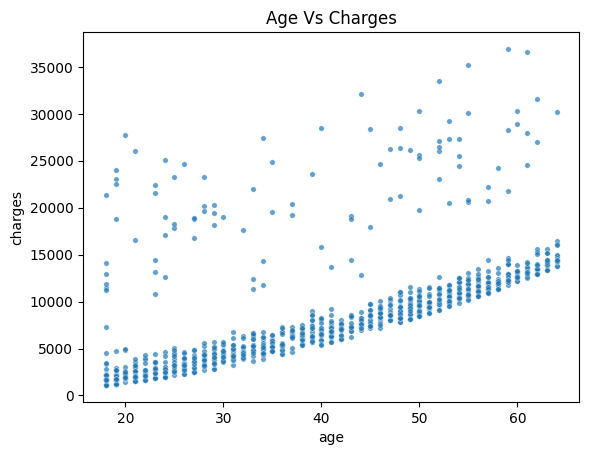

In [31]:
plt.title("Age Vs Charges")
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)

In [32]:
def estimate_charges(age,w,b):
  return w*age+b

In [33]:
w=50
b=100


In [34]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)

Text(0, 0.5, 'Estimated Charges')

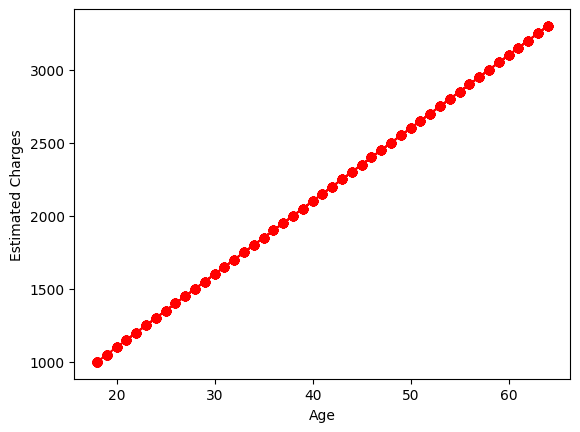

In [35]:
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

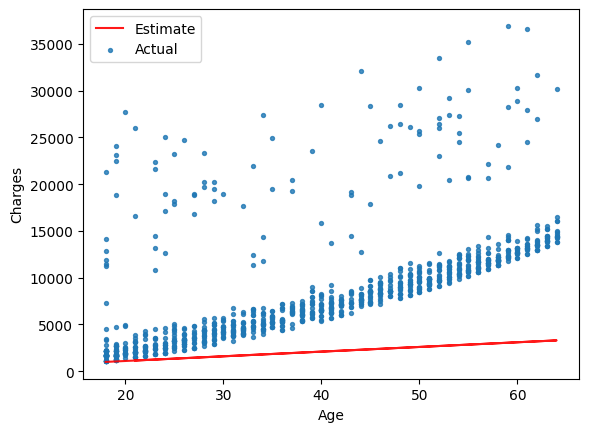

In [36]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

In [37]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges

  estimated_charges=estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)

  plt.xlabel('Age')
  plt.ylabel('Charges')

  plt.legend(['Estimate','Actual'])

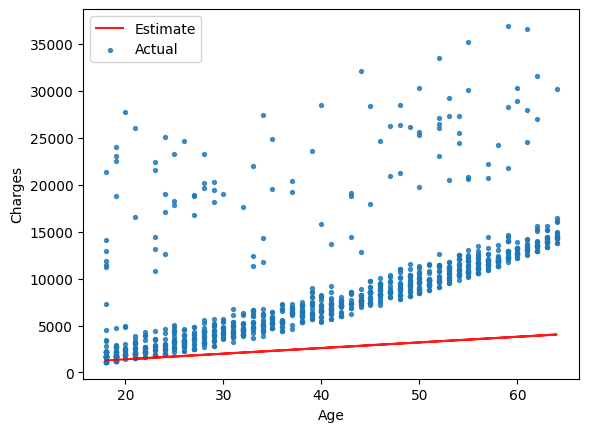

In [38]:
try_parameters(60,200)

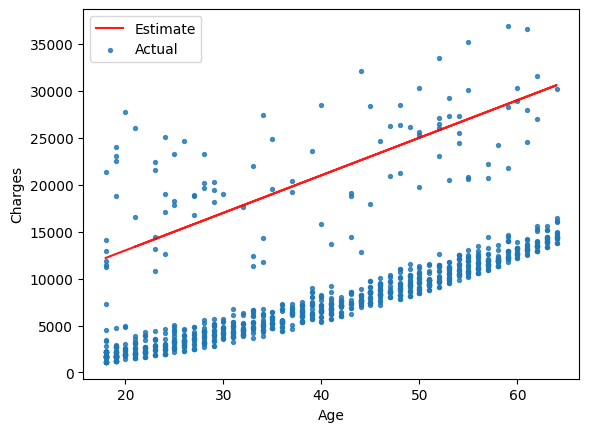

In [39]:
try_parameters(400,5000)

In [40]:
targets=non_smoker_df.charges

In [41]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
predictions=estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [43]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

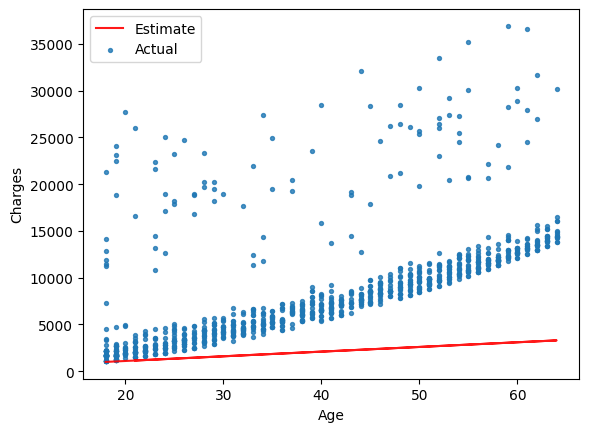

In [44]:
w=50
b=100
try_parameters(w,b)

In [45]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [46]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df['age'],w,b)

In [47]:
rmse(targets,predicted)

8461.949562575493

In [48]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  predictions=estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)

  plt.xlabel('Age')
  plt.ylabel('Charges')

  plt.legend(['Prediction','Actual'])

  loss=rmse(target,predictions)
  print('RMSE loss:',loss)

RMSE loss: 8461.949562575493


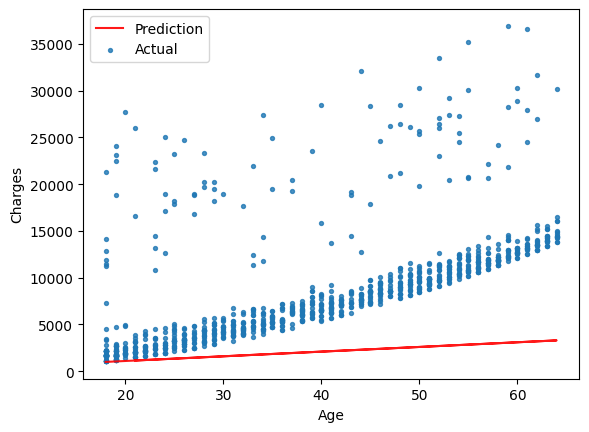

In [49]:
try_parameters(50,100)

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [51]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [52]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges

print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [53]:
model.fit(inputs,targets)

LinearRegression()

In [54]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [55]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [56]:
rmse(targets,predictions)

4662.505766636395

In [57]:
model.coef_#w

array([267.24891283])

In [58]:
model.intercept_#b

-2091.4205565650864

RMSE loss: 4662.505766636395


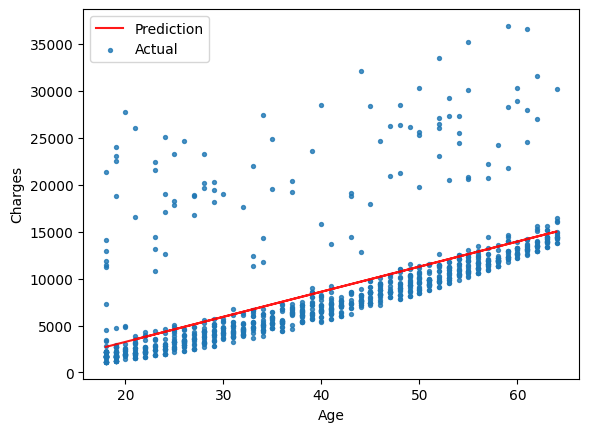

In [59]:
try_parameters(model.coef_,model.intercept_)

In [60]:
inputs,targets=non_smoker_df[['age']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)
loss=rmse(targets,predictions)

print("Loss:",loss)

Loss: 4662.505766636395


Linear Regression using Multiple Features

In [61]:
#1hr 36 min

In [62]:
inputs,targets=non_smoker_df[['age','bmi']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print("Loss:",loss)

Loss: 4662.3128354612945


In [63]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [64]:
fig=px.scatter(non_smoker_df,x='bmi',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [65]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [66]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [67]:
fig=px.strip(non_smoker_df,x='children',y='charges',title='Children Vs Charges')
fig.update_traces(marker_size=4,marker_opacity=0.7)
fig.show()

In [68]:
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print("Loss:",loss)

Loss: 4608.470405038247


In [69]:
medical_df=pd.read_csv('https://raw.githubusercontent.com/JovianHQ/opendatasets/master/data/medical-charges.csv')

In [70]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='smoker', ylabel='charges'>

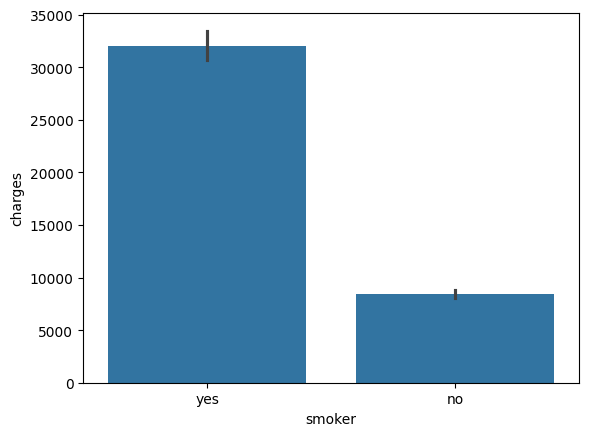

In [71]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [72]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [73]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [74]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [75]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [76]:
inputs,targets=medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print("Loss:",loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

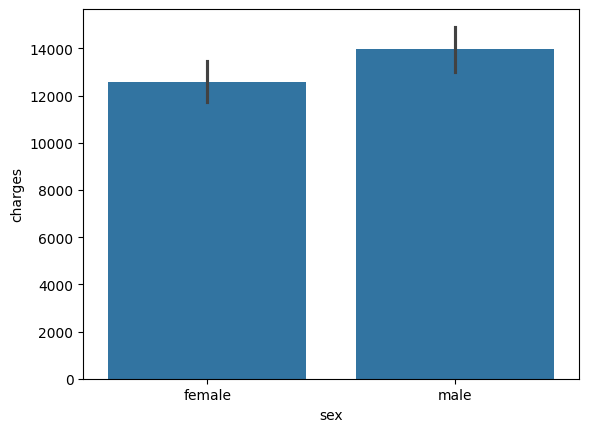

In [77]:
sns.barplot(data=medical_df,x='sex',y='charges')

In [78]:
sex_codes={'female':0,'male':1}


In [79]:
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [80]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [81]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [82]:
inputs,targets=medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print("Loss:",loss)

Loss: 6056.100708754546


One Hot Encoding

<Axes: xlabel='region', ylabel='charges'>

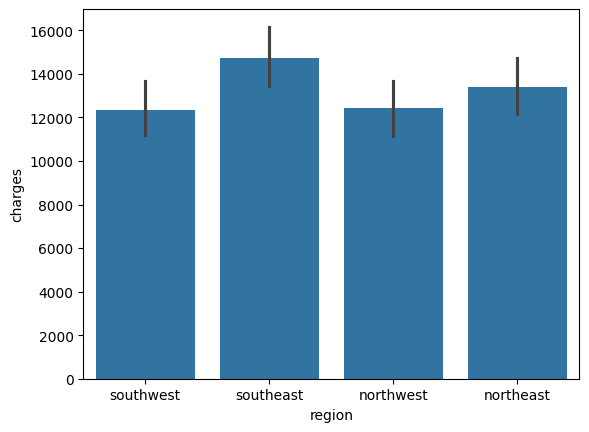

In [84]:
sns.barplot(data=medical_df,x='region',y='charges')

In [85]:

from sklearn import preprocessing

In [86]:
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [87]:
one_hot=enc.transform(medical_df[['region']]).toarray()

In [88]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [89]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [90]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [91]:
inputs,targets=medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print("Loss:",loss)

Loss: 6041.6796511744515


Model Improvemts

In [93]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [94]:
model.intercept_

-12525.547811195444

In [95]:
inputs.columns

Index(['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [96]:
weights_df=pd.DataFrame({
    'feature':np.append(inputs.columns,1),
    'weight':np.append(model.coef_,model.intercept_)

})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [97]:
numeric_cols=['age','bmi','children']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [98]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [99]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [100]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])

In [101]:
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [102]:
cat_cols=['smoker_code','sex_code','northeast','northwest','southeast','southwest']

categorical_data=medical_df[cat_cols].values

In [103]:
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [104]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=medical_df.charges

model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)
loss=rmse(targets,predictions)

print("Loss:",loss)

Loss: 6041.6796511744515
